In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Inspection.csv')
data

/Library/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,05/11/2018,Violations were cited in the following area(s).,08C,Pesticide use not in accordance with label or ...,Not Critical,5.0,A,05/11/2018,04/15/2019,Cycle Inspection / Initial Inspection
1,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,05/11/2018,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,5.0,A,05/11/2018,04/15/2019,Cycle Inspection / Initial Inspection
2,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,05/18/2017,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Critical,7.0,A,05/18/2017,04/15/2019,Cycle Inspection / Initial Inspection
3,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,05/18/2017,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,7.0,A,05/18/2017,04/15/2019,Cycle Inspection / Initial Inspection
4,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,02/18/2016,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,10.0,A,02/18/2016,04/15/2019,Cycle Inspection / Initial Inspection
5,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,02/18/2016,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,10.0,A,02/18/2016,04/15/2019,Cycle Inspection / Initial Inspection
6,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225.0,7182875005,Hamburgers,03/04/2019,Violations were cited in the following area(s).,02G,Cold food item held above 41Âº F (smoked fish ...,Critical,13.0,A,03/04/2019,04/15/2019,Cycle Inspection / Initial Inspection
7,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225.0,7182875005,Hamburgers,03/04/2019,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,Not Critical,13.0,A,03/04/2019,04/15/2019,Cycle Inspection / Initial Inspection
8,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225.0,7182875005,Hamburgers,03/04/2019,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,13.0,A,03/04/2019,04/15/2019,Cycle Inspection / Initial Inspection
9,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225.0,7182875005,Hamburgers,03/13/2018,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,12.0,A,03/13/2018,04/15/2019,Cycle Inspection / Initial Inspection


## Find top 10 Cuisines

In [3]:
cuisine_10 = data['CUISINE DESCRIPTION'].value_counts().head(10)
cuisine_10

American                                                            82623
Chinese                                                             39798
CafÃ©/Coffee/Tea                                                    18122
Pizza                                                               17131
Latin (Cuban, Dominican, Puerto Rican, South & Central American)    16577
Italian                                                             15758
Mexican                                                             15261
Japanese                                                            13670
Caribbean                                                           13471
Spanish                                                             11615
Name: CUISINE DESCRIPTION, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11b5953c8>],
      dtype=object)

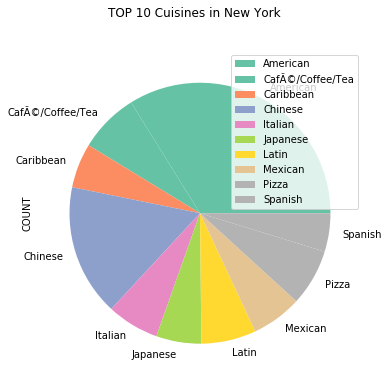

In [4]:
c = data[data['CUISINE DESCRIPTION'].isin(['American','Chinese','CafÃ©/Coffee/Tea','Pizza',
                                            'Latin (Cuban, Dominican, Puerto Rican, South & Central American)',
                                            'Italian','Mexican','Japanese','Caribbean','Spanish'])]
c = c.replace('Latin (Cuban, Dominican, Puerto Rican, South & Central American)', 'Latin')
c1 = c.groupby('CUISINE DESCRIPTION').agg({'CUISINE DESCRIPTION':'count'})
c1.columns = ['COUNT']
# c1.append(c1.sum().rename('Total'))
c1.plot.pie(subplots=True, y='COUNT',figsize=(6, 6), title ='TOP 10 Cuisines in New York',colormap='Set2')

## Find the average inspection score of different cuisines for each borough
### The lower score it has, the better restaurant it is

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

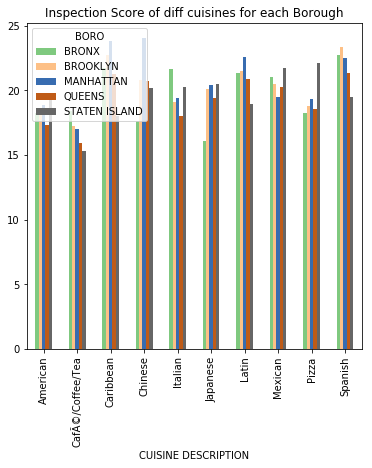

In [5]:
cuisine = data[data.BORO != 'Missing']
cuisine1 = cuisine[cuisine['CUISINE DESCRIPTION'].isin(['American','Chinese','CafÃ©/Coffee/Tea','Pizza',
                                            'Latin (Cuban, Dominican, Puerto Rican, South & Central American)',
                                            'Italian','Mexican','Japanese','Caribbean','Spanish'])]
cuisine1 = cuisine1.replace('Latin (Cuban, Dominican, Puerto Rican, South & Central American)', 'Latin')
cuisine2 = cuisine1.groupby(['CUISINE DESCRIPTION','BORO']).agg({'SCORE':'mean'}).round(2).unstack()
cuisine2
cuisine2['SCORE'].plot.bar(title='Inspection Score of diff cuisines for each Borough',figsize=(6,6),colormap='Accent')
plt.xticks(rotation=90)

# Hypothesis 2
# Restaurant inspections improve the safety of restaurants(Reduce restaurant-attributable food-borne illness).
## With the inspection, restaurant has higher rate on not critical flag when doing re-inspection compare to initial inspection, except Bronx area.

,CRITICAL FLAG,INITIAL RATIO,RE-INSPECT RATIO
BORO,,,
BRONX,Not Critical,0.45,0.42
BROOKLYN,Not Critical,0.44,0.45
MANHATTAN,Not Critical,0.44,0.44
QUEENS,Not Critical,0.43,0.44
STATEN ISLAND,Not Critical,0.42,0.43


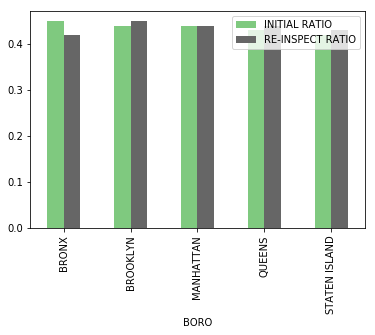

In [6]:
# use CRITICAL FLAG factor to decide the safety of the restaurant
cf = data[data.BORO != 'Missing']
d1 = cf[['CAMIS','DBA','BORO','CRITICAL FLAG','INSPECTION TYPE']]
d_in = d1[d1['INSPECTION TYPE'].str.contains("Initial Inspection",na=False)]
d_in = d_in[d_in['CRITICAL FLAG'] != 'Not Applicable']
d_in = d_in.groupby(['BORO','CRITICAL FLAG']).agg({'CRITICAL FLAG': 'count'})
d_in = d_in.groupby(level=0).apply(lambda x: x / x.sum()).round(2)
d_in.columns = ['INITIAL RATIO']
d_re = d1[d1['INSPECTION TYPE'].str.contains("Re-inspection",na=False)]
d_re = d_re[d_re['CRITICAL FLAG'] != 'Not Applicable']
d_re = d_re.groupby(['BORO','CRITICAL FLAG']).agg({'CRITICAL FLAG': 'count'})
d_re = d_re.groupby(level=0).apply(lambda x: x / x.sum()).round(2)
d_re.columns = ['RE-INSPECTION RATIO']
d_in['RE-INSPECT RATIO'] = d_re['RE-INSPECTION RATIO']
d_in = d_in.reset_index()
d_in = d_in[d_in['CRITICAL FLAG'] == 'Not Critical']
d_in = d_in.set_index('BORO')
d_in.plot(kind = 'bar',colormap='Accent')
d_in

# Where you can have the safest meal of Burger King?
## based on the cirtical flag, we try to see which area has the highest not critical rate on both initial inspection and re-inspection

In [7]:
#Here we use 'burger king' as an example, we put restaurant name as parameter and we can change the name
#to see other restaurants performance
def get_critical_ratio(restaurant):
    """
    This function can get the restaurant's not critical ratio for both initial inspection and
    re-inspection by changing the restaurant name.
    :param restaurant: an original datafram with one restaurant name under DBA
    :return: a new datafram with initial inspection ratio and re-inspection ratio for five boros
    """
    dt1 = data[['CAMIS','DBA','BORO','CRITICAL FLAG','INSPECTION TYPE']]
    restaurant_in = restaurant[restaurant['INSPECTION TYPE'].str.contains("Initial Inspection",na=False)]
    restaurant_in = restaurant_in[restaurant_in['CRITICAL FLAG'] != 'Not Applicable']
    restaurant_in = restaurant_in.groupby(['BORO','CRITICAL FLAG']).agg({'CRITICAL FLAG': 'count'})
    restaurant_in = restaurant_in.groupby(level=0).apply(lambda x: x / x.sum()).round(2)
    restaurant_in.columns = ['INITIAL RATIO']
    restaurant_re = restaurant[restaurant['INSPECTION TYPE'].str.contains("Re-inspection",na=False)]
    restaurant_re = restaurant_re.groupby(['BORO','CRITICAL FLAG']).agg({'CRITICAL FLAG': 'count'})
    restaurant_re = restaurant_re.groupby(level=0).apply(lambda x: x / x.sum()).round(2)
    restaurant_re.columns = ['RE-INSPECTION RATIO']
    restaurant_in['RE-INSPECT RATIO'] = restaurant_re['RE-INSPECTION RATIO']
    restaurant_in = restaurant_in.reset_index()
    restaurant_in = restaurant_in[restaurant_in['CRITICAL FLAG'] == 'Not Critical']
    restaurant_in = restaurant_in.set_index('BORO')
    return restaurant_in
restaurant = data[data.DBA == "BURGER KING"]
ratio = get_critical_ratio(restaurant)
ratio

,CRITICAL FLAG,INITIAL RATIO,RE-INSPECT RATIO
BORO,,,
BRONX,Not Critical,0.53,0.57
BROOKLYN,Not Critical,0.56,0.58
MANHATTAN,Not Critical,0.62,0.62
QUEENS,Not Critical,0.59,0.48
STATEN ISLAND,Not Critical,0.61,0.44


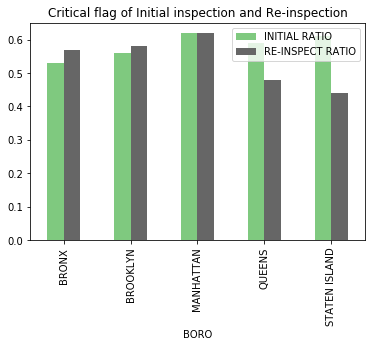

In [8]:
ratio.plot(kind='bar',title='Critical flag of Initial inspection and Re-inspection',colormap='Accent')

### You should eat Burger Kind in Manhattan. You can change the restaurant name, to find out the safest place to eat for other chain restauant

# New York Housing Units by Building dataset

# Hypothesis 2
# The more Moderate/Middle income units in that erea, the higher percentage of A in that borough.

In [9]:
house = pd.read_csv('housing.csv')
house['Project Start Date'] = pd.to_datetime(house['Project Start Date'])
house['Project Start Date'] = pd.DatetimeIndex(house['Project Start Date']).year
house

,Project ID,Project Name,Project Start Date,Project Completion Date,Building ID,Number,Street,Borough,Postcode,BBL,...,2-BR Units,3-BR Units,4-BR Units,5-BR Units,6-BR+ Units,Unknown-BR Units,Counted Rental Units,Counted Homeownership Units,All Counted Units,Total Units
0,44218,MEC E. 125TH ST. PARCEL B WEST,2018,NaN,987329.0,2319,3 AVENUE,Manhattan,10035.0,1.017900e+09,...,129,15,0,0,0,0,297,0,297,404
1,44256,WSFSSH. 145 WEST 108TH ST. VALLEY LODGE,2018,NaN,988143.0,137-159,WEST 108 STREET,Manhattan,10025.0,1.018630e+09,...,19,8,0,0,0,0,199,0,199,199
2,48038,165 WEST 80TH STREET,2018,NaN,35779.0,165,WEST 80 STREET,Manhattan,10024.0,1.012110e+09,...,0,0,0,0,0,0,29,0,29,29
3,68087,151 SOMERS STREET CONDOMINIUMS,2018,NaN,371705.0,151,SOMERS STREET,Brooklyn,11233.0,3.015400e+09,...,0,0,0,0,0,0,0,2,2,8
4,63168,MANHANTANVILLE (PHASE II),2018,12/27/2018,967819.0,3595,BROADWAY,Manhattan,10031.0,1.020948e+09,...,7,0,0,0,0,0,0,7,7,43
5,64492,3377 WHITE PLAINS ROAD LLC.YR15.FY19,2018,NaN,874245.0,3377,WHITE PLAINS ROAD,Bronx,10467.0,2.046240e+09,...,0,0,0,0,0,0,72,0,72,72
6,66653,CAMBER. 3-11 W118TH ST. VICTORY PLAZA,2018,NaN,985501.0,11,WEST 118 STREET,Manhattan,10026.0,1.017170e+09,...,0,0,0,0,0,0,136,0,136,136
7,66931,2178 BERGEN STREET,2018,NaN,986562.0,2178,BERGEN STREET,Brooklyn,11233.0,3.014560e+09,...,4,0,0,0,0,0,7,0,7,33
8,67577,ESPLANADE GARDENS INCORPORATED.PLP.FY19,2018,NaN,3638.0,2541,ADAM C POWELL BOULEVARD,Manhattan,10039.0,1.020160e+09,...,210,51,0,0,0,0,0,312,312,312
9,67577,ESPLANADE GARDENS INCORPORATED.PLP.FY19,2018,NaN,23412.0,700,ESPLANADE GDNS PLAZA,Manhattan,10039.0,1.017440e+09,...,209,52,0,0,0,0,0,312,312,312


# Find the moderate and middle income units rate for each borough

In [10]:
def get_mid_units_ratio(year):
    """
    This function can get the total moderate and middle income units rate for 5 boros.
    :param year: an original datafram with a select year under Project Start Date column
    :return: a new datafram with select year moderat/middle income units rate for five boros.
    """
    house1 = year[['Borough','Project Start Date','Extremely Low Income Units', 'Very Low Income Units',
           'Low Income Units', 'Moderate Income Units', 'Middle Income Units','Other Income Units',]]
    house2 = house1.groupby('Borough').agg({'Extremely Low Income Units': 'sum','Very Low Income Units':'sum',
                                                         'Low Income Units':'sum','Moderate Income Units':'sum',
                                                         'Middle Income Units':'sum','Other Income Units':'sum'})
    house2['Total'] = house2.sum(axis=1)
    house3 = house2.div(house2['Total'], axis='index').round(2)
    house4 = house3.reset_index()
    house4['Moderate_Middle_Units'] = house4['Moderate Income Units']+house4['Middle Income Units']
    house5 = house4[['Borough','Moderate_Middle_Units']]
    return house5

year1 = house[house['Project Start Date'] == 2016]
year2 = house[house['Project Start Date'] == 2017]
year3 = house[house['Project Start Date'] == 2018]

a1 = get_mid_units_ratio(year1)
a2 = get_mid_units_ratio(year2)
a3 = get_mid_units_ratio(year3)

In [14]:
df = a1.merge(a2, on='Borough', how='left').merge(a3, on='Borough', how='left')
df.columns = ['Borough','Year_2016','Year_2017','Year_2018']
df1 = df.set_index('Borough')
df1 = df1.T
df1

Borough,Bronx,Brooklyn,Manhattan,Queens,Staten Island
Year_2016,0.09,0.19,0.19,0.27,0.02
Year_2017,0.03,0.14,0.26,0.15,0.16
Year_2018,0.04,0.08,0.08,0.25,0.02


## Find Grade A's percentage for each boros

In [12]:
grade = data[['BORO','GRADE','GRADE DATE']]
grade = grade[grade.BORO != 'Missing']
grade1 = grade.dropna(subset=['GRADE', 'GRADE DATE'])
grade1['GRADE DATE'] = pd.to_datetime(grade1['GRADE DATE'])
grade1['GRADE YEAR'] = pd.DatetimeIndex(grade1['GRADE DATE']).year
grade2 = grade1[grade1['GRADE YEAR'].isin(['2016','2017','2018'])]
grade2 = grade2[['BORO','GRADE','GRADE YEAR']]
grade3 = grade2.groupby(['BORO','GRADE YEAR','GRADE']).agg({'GRADE':'count'}).unstack()
grade4 = grade3.fillna(0)
grade4['total']=grade4.sum(axis=1)
grade5 = grade4.div(grade4['total'],axis='index').round(2)
grade6 = grade5.xs('A', level='GRADE', axis=1)
grade6

/Library/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Library/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


GRADE
BORO          GRADE YEAR       
BRONX         2016         0.78
              2017         0.83
              2018         0.77
BROOKLYN      2016         0.81
              2017         0.81
              2018         0.77
MANHATTAN     2016         0.84
              2017         0.83
              2018         0.78
QUEENS        2016         0.85
              2017         0.82
              2018         0.79
STATEN ISLAND 2016         0.85
              2017         0.79
              2018         0.78

### Use line plot to see if there is relationship between moderate/middle income units rate and Grade A's rate in five boros.
### The result does not support that the richer area it is, the higher grade will be. It can not prove our hypothese 3.

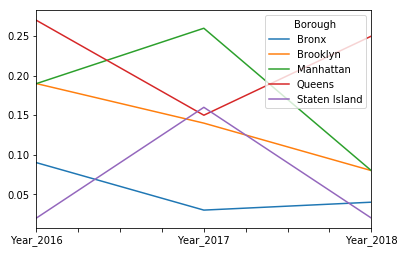

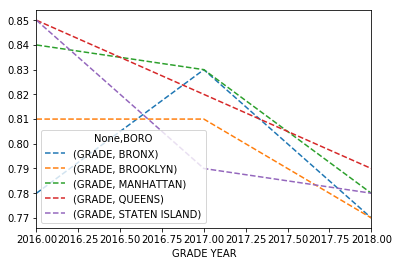

In [13]:
ax = df1.plot()
ax
grade6.unstack(level=0).plot(linestyle="--")